# <center>CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS</center>

## Table of Contents

I. [Introduction: Business Problem](#introduction)

II. [Data](#data)

III. [Methodology](#methodology)

IV [Analysis](#analysis)

V [Results and Discussion](#results)

VI [Conclusion](#conclusion)
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#getting_data">Getting Data</a>

2. <a href="#Get_New_York_City_Neihborhood_list">Get New York City Neihborhood list</a>

3. <a href="#Get_Hong_Kong_district_list">Get Hong Kong district list</a>

4. <a href="#Get_venues_of_New_York_neighborhoods">Get venues of New York neighborhoods</a>

4. <a href="#Explore_New_York_Boroughs">Explore New York Boroughs</a>

4. <a href="#Explore_Hong_Kong_Districts">Explore Hong Kong Districts</a>

2. <a href="#item2">Explore Neighborhoods in New York City</a>

3. <a href="#Analyze_Boroughs_Districts">Analyze Boroughs/Districts</a>

4. <a href="#Clustering">Clustering</a>

5. <a href="#Examine_Clusters">Examine Clusters</a>    
</font>
</div>

## Introduction: Business Problem <a name="introduction"></a>

The choice of a place to live might depend on factors such as safety, school, job, house cost, life cost, venues etc. In this project, the interest will be on last factor, venues.

_More than 26% of the world’s 2,095 billionaires live in just 10 cities on three continents_. In 2020, the two first cities with the most billinaires are New York City,USA (<b>92</b>) and Hong Kong, China (<b>71</b>). (<a href="https://www.forbes.com/sites/giacomotognini/2020/04/07/worlds-richest-cities-the-top-10-cities-where-most-billionaires-call-home-2020/#d82ea6f3101a">Forbes</a>)

<div style="text-align:center; width:100%">
    <h3>The two first cities where most billinaires call <i>home</i>: New York City and Hong Kong</h3>
    <br>
    <div>
        <div style="display: inline-block; width:45%">
        <img src = "https://specials-images.forbesimg.com/imageserve/5e88b867e2bb040006427704/960x0.jpg?fit=scale" width = 400>
        <span><b>New York City,USA (92 billionaires)</b></span>
    </div>
    <div style="display: inline-block;  width:45%">
        <img src = "https://specials-images.forbesimg.com/imageserve/5e88b87fb0a4e4000746be54/960x0.jpg?fit=scale" width = 400>
        <span><b>Hong Kong, China (71 billionaires)</b></span>
    </div>
        <br>
        <span>source: <a href="https://www.forbes.com/sites/giacomotognini/2020/04/07/worlds-richest-cities-the-top-10-cities-where-most-billionaires-call-home-2020/#d82ea6f3101a">https://www.forbes.com/sites/giacomotognini/2020/04/07/worlds-richest-cities-the-top-10-cities-where-most-billionaires-call-home-2020/#d82ea6f3101a</a></span>
    </div>
</div>


One might wonder what kinds of venues are in these two cities where the world's highest number of billinaires settled? How similar are these cities in terms of venues?

In this project, the focus will be on venues of Manhattan (richest borough) in New york and Wan Chai (richest district) in Hong Kong, the two cities with the highest number of billionaires accorging to <a href="https://www.forbes.com/sites/giacomotognini/2020/04/07/worlds-richest-cities-the-top-10-cities-where-most-billionaires-call-home-2020/#d82ea6f3101a">Forbes</a> ranking in 2020. But, interest will be specific to Manhattan which is the wealthiest borough of New York, and Wan Chai the wealthiest district of Hong Kong.

The main ojective of this project is to compare the wealthiest Borough of New York to the wealthiest district of Hong Kong, the world's two most popular cities among billionaires, in terms of venues.

This project will provide useful information to people who are willing to live in one of these two cities by helping to make a choice that fit them. The project will also allow people who want to create a business (restaurant, shop ,etc) to identify the competitors and have an idea on which kinds of business are common in the two wealthiest place of the world's two first cities where billionaires decide to live.

#### Import required libraries

In [849]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# Shape library, check if a point is in a given polygon
from shapely.geometry import Point, Polygon

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/amos/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.40.1            |       h21bd128_2         6.5 MB  https://repo.anaconda.com/pkgs/main/linux-64
    ------------------------------------------------------------
                                           Total:         6.5 MB

The following packages will be UPDATED:

  graphviz                                2.40.1-h21bd128_1 --> 2.40.1-h21bd128_2

The following packages will be DOWNGRADED:

  _ipyw_jlab_nb_ext~                                        --> 
  _libgcc_mutex                                             --> 
  anaconda                                                  --> 
  backports.os                                              --> 
  backports.shutil_~                                  

#### Define Foursquare Credentials and Version

In [850]:
# @hidden_cell
CLIENT_ID = 'UQB1BHX3EZL515XXVQQW2MEL3101IIFFQEFQJVJ0H2EUI321' # your Foursquare ID
CLIENT_SECRET = 'XVBM5XXWHDOQFWKWBM21WJNCLL40OJV0EJYC3WSX3UTF1MUS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UQB1BHX3EZL515XXVQQW2MEL3101IIFFQEFQJVJ0H2EUI321
CLIENT_SECRET:XVBM5XXWHDOQFWKWBM21WJNCLL40OJV0EJYC3WSX3UTF1MUS


## II. Data <a name="data"></a>

The data that will be used in this project will come from mainly four sources: 
    <ul>
        <li><a href="https://en.wikipedia.org">wikipedia</a> for Hong Kong's district list</li>
        <li><a href="https://cocl.us/new_york_dataset">https://cocl.us/new_york_dataset</a> for the list of New York neighborhoods</li>
        <li><a href="https://nominatim.openstreetmap.org/">Open Street Map geocoging library for python: Nominatim </a> to transform districts and neighborhoods addresses into geographic coordinates (latitude and longitude)</li>
        <li><a href="https://developer.foursquare.com/docs/places-api/">Foursquare</a> to get venues list (not the complete list) in each districts and neighborhoods</li>
        <li><a href="https://gadm.org/download_country_v3.html">GADM</a> to get the poygons of the district of Wan Chai</li>
    </ul>

These sources have been choosen because of the data availabity and their costs. Indeed, expect <a href="https://developer.foursquare.com/docs/places-api/">Foursquare</a>, all the others sources are free. Fourtunately, despite of some limitations the regular calls using the free API key of Foursquare provide quite enough data for this project.

After cleaning, the data about New York nieghboorhoods will besimilar to that

<div>
    <img src = "https://raw.githubusercontent.com/bationoA/Coursera_Capstone/6d7f1806fa05d8632648116c334a225a625ed108/New-York-Neighborhoods.png" width = 400>
    <!--New-York-Neighborhoods.png-->
</div>

The data about Hong Kong's districts provided by Wikipedia will look like

<div>
    <img src = "https://raw.githubusercontent.com/bationoA/Coursera_Capstone/6d7f1806fa05d8632648116c334a225a625ed108/Hong-Kong-Districts.png" width = 400>
   <!--Hong-Kong-Districts.png-->
</div>

But, since there are no predefined neighborhoods for the districts of Hong Kong, we will generate some custom neighborhoods using the poplygon got from GADM and Nominatim.

For Foursquare, the response of the queries will be in JSON(JavaScript Object Notation) format combining **_distionaries_** and **_lists_**.

For each response object stored in a variable called **_results_**, venues list will be accessible through **results['response']['groups'][0]['items']**

For each venue results['response']['groups'][0]['items']**['venue']** , the features that will selected are
<ul>
    <li><b>Venue name</b>: ['name']</li>
    <li><b>Venue latitude</b>: ['location']['lat']</li>
    <li><b>Venue longitude</b>: ['location']['lng']</li>
    <li><b>Venue category</b>: ['categories'][0]['name']</li>
</ul>

### II.1. Get Manhattan Neihborhood list

In [851]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [852]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [853]:
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
new_york_neighborhoods = pd.DataFrame(columns=column_names)

In [854]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    new_york_neighborhoods = new_york_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Let's extra only neighborhoods of Manhattan

In [855]:
Manhattan_neighborhoods = new_york_neighborhoods[new_york_neighborhoods['Borough']=='Manhattan']
Manhattan_neighborhoods.reset_index(drop=True,inplace=True)
Manhattan_neighborhoods.drop(['Borough'],axis=1, inplace=True)
Manhattan_neighborhoods.head()

/home/amos/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Neighborhood,Latitude,Longitude
0,Marble Hill,40.876551,-73.910660
1,Chinatown,40.715618,-73.994279
2,Washington Heights,40.851903,-73.936900
3,Inwood,40.867684,-73.921210
4,Hamilton Heights,40.823604,-73.949688


Get Manhattan Latitude and longitude

In [856]:
address = 'Manhattan, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location_MTn = geolocator.geocode(address)
print('Manhattan: lat {}, lng {}'.format(location_MTn.latitude,location_MTn.longitude))

Manhattan: lat 40.7896239, lng -73.9598939


In [857]:
# Save Data frame into a CSV format
Manhattan_neighborhoods.to_csv('Manhattan_neighborhoods.csv')

Read data

In [858]:
Manhattan_neighs = pd.read_csv('Manhattan_neighborhoods.csv')
print('Data imported')

Data imported


In [859]:
for col in Manhattan_neighs.columns:
    if col not in ['Neighborhood', 'Latitude', 'Longitude']:
        del Manhattan_neighs[col]

In [860]:
Manhattan_neighs.shape

(40, 3)

In [861]:
Manhattan_neighs.head()

,Neighborhood,Latitude,Longitude
0,Marble Hill,40.876551,-73.910660
1,Chinatown,40.715618,-73.994279
2,Washington Heights,40.851903,-73.936900
3,Inwood,40.867684,-73.921210
4,Hamilton Heights,40.823604,-73.949688


##### Let's visualize Manhattan Neighnorhoods on the map

In [862]:
# create map of Hong Kong using latitude and longitude values
zoom_start=11
map_Manhattan_neighs = folium.Map(location=[location_MTn.latitude, location_MTn.longitude], zoom_start=zoom_start)

# add markers to map
colors_name_list = list(colors.cnames.keys())
i = 1
print('drawing: ', end='')
for index, neigh in Manhattan_neighs.iterrows():
    #print(i, end=' - ')
    current_color = colors_name_list[i]
    folium.CircleMarker(
        [neigh.Latitude,neigh.Longitude],
        popup=neigh.Neighborhood,
        color=current_color,
        radius=5,
        fill=True,
        fill_color=current_color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_Manhattan_neighs)
            
    i = 0 if (i==len(colors_name_list)-1) else i+1

    
#feature_HK_districts.add_to(map_HK_districts)
print('Manhattan Neighborhoods- zoom start level ',zoom_start)
map_Manhattan_neighs

drawing: Manhattan Neighborhoods- zoom start level  11


### I.2. Get Hong Kong district list <span id="Get_Hong_Kong_district_list"></span>

In [863]:
hong_kong = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Hong_Kong')
print('Data downloaded!')

Data downloaded!


In [864]:
hong_kong_districts = hong_kong[5]
hong_kong_districts.head()

,District,Chinese,Population (2016)[6],Comparable Territory (2018)[7],Population Growth (From 2006)[6],Density(/km2)[6]
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391
1,Eastern,東區,555034,Cape Verde,-2.8%,30861
2,Southern,南區,274994,French Guiana (France),-0.6%,7080
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137
4,Hong Kong Island Subtotal,Hong Kong Island Subtotal,1253417,East Timor,-1.2%,15691


Create empty latitude and longitude columns

In [865]:
hong_kong_districts['Latitude']=""
hong_kong_districts['Longitude']=""

In [866]:
hong_kong_districts.head()

,District,Chinese,Population (2016)[6],Comparable Territory (2018)[7],Population Growth (From 2006)[6],Density(/km2)[6],Latitude,Longitude
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391,,
1,Eastern,東區,555034,Cape Verde,-2.8%,30861,,
2,Southern,南區,274994,French Guiana (France),-0.6%,7080,,
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137,,
4,Hong Kong Island Subtotal,Hong Kong Island Subtotal,1253417,East Timor,-1.2%,15691,,


Get Hong Kong location

In [867]:
address = 'Hong Kong, CN'
geolocator = Nominatim(user_agent="ny_explorer")
location_HK = geolocator.geocode(address)
print('Hong Kong: lat {}, lng {}'.format(location_HK.latitude,location_HK.longitude))

Hong Kong: lat 22.2793278, lng 114.1628131


Get latitude and longitude of Hong Kong districts

In [868]:
for i in range(len(hong_kong_districts)):
    address = hong_kong_districts['District'][i]+', CN'
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    if location == None:
        print('location not found for {}.'.format(address))
    else:
        hong_kong_districts['Latitude'][i] = location.latitude
        hong_kong_districts['Longitude'][i] = location.longitude
print('Done.')

/home/amos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/amos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


location not found for Hong Kong Island Subtotal, CN.
location not found for Kowloon Subtotal, CN.
location not found for New Territories Subtotal, CN.
Done.


In [869]:
print('Total number of districts: {}'.format(len(hong_kong_districts)))

Total number of districts: 22


In [870]:
print('Total number of districts with non null coordinates: {}'.format(len(hong_kong_districts[(hong_kong_districts['Latitude']!='') & (hong_kong_districts['Longitude']!='')])))

Total number of districts with non null coordinates: 19


let's consider only rows with non empty coordinates

In [871]:
hong_kong_districts = hong_kong_districts[(hong_kong_districts['Latitude']!='') & (hong_kong_districts['Longitude']!='')]
hong_kong_districts.head()

,District,Chinese,Population (2016)[6],Comparable Territory (2018)[7],Population Growth (From 2006)[6],Density(/km2)[6],Latitude,Longitude
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391,22.2813,114.16
1,Eastern,東區,555034,Cape Verde,-2.8%,30861,45.7365,-76.8935
2,Southern,南區,274994,French Guiana (France),-0.6%,7080,22.2193,114.225
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137,22.279,114.172
5,Sham Shui Po,深水埗區,405869,Belize,+11.0%,43381,22.3282,114.161


reset rows index and drop the old index column

In [872]:
hong_kong_districts.reset_index(drop=True,inplace=True)
hong_kong_districts.head()

,District,Chinese,Population (2016)[6],Comparable Territory (2018)[7],Population Growth (From 2006)[6],Density(/km2)[6],Latitude,Longitude
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391,22.2813,114.16
1,Eastern,東區,555034,Cape Verde,-2.8%,30861,45.7365,-76.8935
2,Southern,南區,274994,French Guiana (France),-0.6%,7080,22.2193,114.225
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137,22.279,114.172
4,Sham Shui Po,深水埗區,405869,Belize,+11.0%,43381,22.3282,114.161


Save the data frame in csv format

In [873]:
hong_kong_districts.to_csv('hong_kong_districts.csv')

In [874]:
hong_kong_districts = pd.read_csv('hong_kong_districts.csv')

In [875]:
for col in hong_kong_districts.columns:
    if col not in ['District', 'Chinese', 'Population (2016)[6]', 'Comparable Territory (2018)[7]', 'Population Growth (From 2006)[6]', 'Density(/km2)[6]', 'Latitude', 'Longitude']:
        del hong_kong_districts[col]
hong_kong_districts.head()

,District,Chinese,Population (2016)[6],Comparable Territory (2018)[7],Population Growth (From 2006)[6],Density(/km2)[6],Latitude,Longitude
0,Central and Western,中西區,243266,Mayotte (France),-2.7%,19391,22.281322,114.160258
1,Eastern,東區,555034,Cape Verde,-2.8%,30861,45.736546,-76.893538
2,Southern,南區,274994,French Guiana (France),-0.6%,7080,22.219263,114.225230
3,Wan Chai,灣仔區,180123,Saint Lucia,-0.1%,17137,22.279015,114.172483
4,Sham Shui Po,深水埗區,405869,Belize,+11.0%,43381,22.328190,114.160854


Function to query venues from Foursquare (venues_Objects request)

In [876]:
def venues_request(latitude, longitude,radius = 500,limit = 100):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, limit)
    results = requests.get(url).json()
    return results['response']['groups'][0]['items']

Function get_nearBy_venues() to get list of venues with location and boroughs/neighborhoods

In [877]:
def get_nearby_venues(data,radius = 500,limit = 100):
    type_data = type(pd.DataFrame())
    type_indentifier = type(pd.DataFrame())
    if not isinstance(data, type_data):
        print("Expecting a pandas.core.frame.DataFrame, but {} given.".format(type_data))
        return;
    columsNames = data.columns
    
    venues_col_names = ['Name','Latitude','Longitude','Category','Neighborhood','Neighborhood_Latitude','Neighborhood_Longitude']
    venues = pd.DataFrame(columns=venues_col_names)
    # Loop through Districts or neighborhoods
    print('Working', end='')
    for i in range(len(data)):
        print('.', end='') # Loading dots
        lat = data['Latitude'][i]
        lng = data['Longitude'][i]
        venues_objects = venues_request(lat,lng,radius,limit)
        # loop through venues
        for obj in venues_objects:
            venues = venues.append({'Name': obj['venue']['name'],
                           'Latitude': obj['venue']['location']['lat'],
                           'Longitude': obj['venue']['location']['lng'],
                           'Category': obj['venue']['categories'][0]['name'],
                           'Neighborhood': data['Neighborhood'][i],
                           'Neighborhood_Latitude': data['Latitude'][i],
                           'Neighborhood_Longitude': data['Longitude'][i]}, ignore_index=True)
    print('Done')
    return venues

##### Load Hong Kong districts polygons

The polygons data comes from <a href="https://gadm.org/download_country_v3.html">https://gadm.org/download_country_v3.html</a>

In [878]:
#Load Hong Kong districts polygons
with open('Hong-Kong-Districts.geojson') as json_data:
    hkg_districts_poly = json.load(json_data)

print('Data loaded')

Data loaded


###### Display Hong Kong districts on Map

###### Create a data frame for districts polygons

In [879]:
#Create a data frame for districts polygons
df_HKG_districts_poly = pd.DataFrame(columns=['Name','geometry_type','geometry_coordinates'])

for feat in hkg_districts_poly['features']:
    df_HKG_districts_poly = df_HKG_districts_poly.append({'Name': feat['properties']['NAME_1'],
                           'geometry_type': feat['geometry']['type'],
                           'geometry_coordinates': feat['geometry']['coordinates']}, ignore_index=True)
    
df_HKG_districts_poly.head()

,Name,geometry_type,geometry_coordinates
0,Central and Western,MultiPolygon,"[[[[114.16697692871094, 22.281528472900447], [..."
1,Eastern,MultiPolygon,"[[[[114.17791748046886, 22.283470153808594], [..."
2,Islands,MultiPolygon,"[[[[113.93291473388672, 22.324028015136832], [..."
3,Kowloon City,MultiPolygon,"[[[[114.20491790771484, 22.334751129150447], [..."
4,Kwai Tsing,MultiPolygon,"[[[[114.14892578125011, 22.380218505859432], [..."


In [880]:
colors_name_list = list(colors.cnames.keys())

In [881]:
def invCoord(coords):
    rslt = []
    if len(coords)==2:
        if not isinstance(coords[0], (list,tuple)):
            rslt = [coords[1],coords[0]]
            if isinstance(coords, tuple):
                rslt = tuple(rslt)
            return rslt
        
    for xy in coords:
        yx = [xy[1],xy[0]]
        if isinstance(xy, tuple):
            yx = tuple(yx)
        
        rslt.append(yx)
        
    if isinstance(coords, tuple):
        rslt = tuple(rslt)
    
    return rslt
    

In [882]:
def isPolygonValid(poly):
    length = len(poly)
    if length<3:
        return False
    for crd in poly:
        if len(crd)!=2:
            return False
        if (isinstance(crd[0],(list,tuple)) | isinstance(crd[1],(list,tuple))):
            return False
        if ((not isinstance(crd[0],(int,float))) | (not isinstance(crd[1],(int,float)))):
            return False
    if ((poly[0][0]!=poly[length-1][0]) | (poly[0][1]!=poly[length-1][1])):
        return False
    return True

In [883]:
def getDistrictPolygon(district, df):
    return df[df['Name']==district].geometry_coordinates

In [884]:
def formatForPolygon(polygon,close_end=False,reverseCoords=True):
    pol = []
    n = len(polygon)
    i = 0
    the_end = n-1
    if close_end:
        the_end = n
    for pt in polygon:
        # skip the last point since the first and the last point are equals
        if(i<the_end):
            xy=pt
            if reverseCoords:
                xy = [pt[1],pt[0]] # transform from lngLat to latLng
            pol.append(tuple(xy))
        i = i+1
    return pol

In [885]:
def fromatRectangle(bounds,lat_div=[0,0],lng_div=[0,0]):
    
    coord_00=bounds[0]
    coord_11=bounds[1]
    
    if lng_div[0]!=0:
        coord_00[1] = coord_00[1]+abs(coord_11[1]-coord_00[1])/lng_div[0]
    if lng_div[1]!=0:
        coord_11[1] = coord_11[1]+abs(coord_11[1]-coord_00[1])/lng_div[1]
        
    if lat_div[0]!=0:
        coord_00[0] = coord_00[0]+abs(coord_11[0]-coord_00[0])/lat_div[0]
    if lat_div[1]!=0:
        coord_11[0] = coord_11[0]+abs(coord_11[0]-coord_00[0])/lat_div[1]
    
    coord_01=[coord_00[0],coord_11[1]]
    coord_10=[coord_11[0],coord_00[1]]
    center=[(coord_00[0]+coord_11[0])/2,(coord_00[1]+coord_11[1])/2]
    
    
    
    return {'bounds':[coord_00,coord_11],'center':center,'rectangle':[coord_00,coord_01,coord_11,coord_10,coord_00]}

In [886]:
def cutRectangleInSmallPieces(rectangle,dim):
    if (len(rectangle)!=4) & (len(rectangle)!=5):
        print('error: rectangle must have 4 points, {} point(s) given'.format(len(rectangle)))
        return
    if len(dim)!=2:
        print('must be a list of 2 non-zero integers ')
        return
    
    a=rectangle[0]
    b=rectangle[1]
    c=rectangle[2]
    
    div_lat = dim[0]
    div_lng = dim[1]
    
    lng_delta = abs(b[1]-a[1])/div_lng
    lat_delta = abs(c[0]-b[0])/div_lat
     
    
    lat = a[0]
    lng = a[1]
    rectangle_list = []
    
    next_lat = 0
    next_lng = 0
    
    for i in range(div_lat):
        next_lat = lat+lat_delta
        for j in range(div_lng):
            next_lng = lng+lng_delta
               
            bnds = [[lat,lng],[next_lat,next_lng]]

            new_rect = fromatRectangle(bnds)

            rectangle_list.append(new_rect)
            
            lng = next_lng
        
        lat = next_lat
        lng = a[1]
    
    print(len(rectangle_list),' rectangle(s) returned')
    
    return rectangle_list

#### Let's visualise the district of Wan Chai on the map

In [887]:
# create map of Hong Kong using latitude and longitude values
zoom_start=12
map_HK_districts = folium.Map(location=[location_HK.latitude, location_HK.longitude], zoom_start=zoom_start)

# color list
colors_name_list = list(colors.cnames.keys())
i = 1
feature_HK_districts = folium.FeatureGroup(name='HongKongDistricts')
Wan_Chai_poly=None
Wan_Chai_poly_coords=None
for coords, name in zip(df_HKG_districts_poly['geometry_coordinates'], df_HKG_districts_poly['Name']):
    coords = list(coords)
    label = folium.Popup(name, parse_html=True)
    current_color = colors_name_list[i]
    #print(name,'col: ',current_color)
    #print(i,'- Polygons: ',len(coords))
    for multiPol in coords:
        for poly in multiPol:
            if(isPolygonValid(poly)):
                curr_poly = folium.PolyLine(
                    formatForPolygon(poly,close_end=False,reverseCoords=True),
                    popup=name,
                    color=current_color,
                    fill=True,
                    fill_color=current_color,
                    fill_opacity=0.7,
                    parse_html=False)
                curr_poly.add_to(feature_HK_districts)
                if name=="Wan Chai":
                    Wan_Chai_poly_coords = poly
                    Wan_Chai_poly = curr_poly
            
         
    i = i+1 # Chose high step so that colors become more differentiable

Wan_Chai_rectangle = fromatRectangle(Wan_Chai_poly.get_bounds(),lat_div=[0,0],lng_div=[0,0])
folium.PolyLine(
    Wan_Chai_rectangle['rectangle'],
    popup="Wan Chai boundaries",
    color="red",
    fill=False,
    parse_html=False).add_to(feature_HK_districts)
    
#feature_HK_districts.add_to(map_HK_districts)
print('Districts of Hong Kong - zoom start level ',zoom_start)
feature_HK_districts.add_to(map_HK_districts)

map_HK_districts

Districts of Hong Kong - zoom start level  12


#### let's divide the district of Wan Chai into 42 neighborhoods (6X7)

In [888]:
Wan_Chai_neighboorhoods_rectangles = cutRectangleInSmallPieces(Wan_Chai_rectangle['rectangle'], dim=[6,7])

42  rectangle(s) returned


Let's visualize neighborhoods on the map and draw a circle of 270 m radius in which venues will be selected

In [889]:
# create map of Hong Kong using latitude and longitude values
zoom_start=10
map_Wan_Chai_neighs_rect = folium.Map(location=[location_HK.latitude, location_HK.longitude], zoom_start=zoom_start)

# add markers to map
colors_name_list = list(colors.cnames.keys())
i = 1
print('drawing: ', end='')
for rectangle in Wan_Chai_neighboorhoods_rectangles:
    #print(i, end=' - ')
    current_color = colors_name_list[i]
    folium.PolyLine(
        rectangle['rectangle'],
        popup="Neighboorhood {}".format(i),
        color=current_color,
        fill=True,
        fill_color=current_color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_Wan_Chai_neighs_rect)
    
    folium.Circle(
        rectangle['center'],
        popup="Neighboorhood {}".format(i),
        color='red',
        radius=270,
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Wan_Chai_neighs_rect)
            
    i = 0 if (i==len(colors_name_list)-1) else i+1

    
#feature_HK_districts.add_to(map_HK_districts)
print('Wan Chai Districts Neighborhoods- zoom start level ',zoom_start)

map_Wan_Chai_neighs_rect.fit_bounds(Wan_Chai_rectangle['bounds'])
map_Wan_Chai_neighs_rect

drawing: Wan Chai Districts Neighborhoods- zoom start level  10


Now, I need to remove neighborhoods those center is not located in Wan Chai.

To do that I will use the polygon of Wan Chain district, **Wan_Chai_poly_coords**.

In [890]:
def get_neighborhood_name(latlng):
    """This function transform latitude and longitude into a string address"""
    ad='Not Found'
    try_location = geolocator.reverse(latlng, exactly_one=True)
    try_address = try_location.raw['address']
    if(try_address):
        keys_list = list(try_address.keys())
        
        ad1=try_address[keys_list[0]]
        ad2=try_address[keys_list[1]]
        if(ad1!=ad2):
            ad = ad1+' '+ad2
        else:
            ad = ad1
        
    return ad

In [954]:
i=0 # number of neighborhoods center outside Wan Chai
j=0 # number of neighborhoods center inside Wan Chai
WCh_poly = Polygon(formatForPolygon(Wan_Chai_poly_coords)) # create polygon
WanChai_neigh_rectangles_new = []
Wan_Chai_neighs = pd.DataFrame(columns=['Neighborhood','Latitude','Longitude'])
for neigh in Wan_Chai_neighboorhoods_rectangles:
    #current_poly = formatForPolygon(plg) # format for polygon [(,),(,),(,),...]
    #print(current_poly)
    center = neigh['center']
    current_center = Point(center)
    if(not WCh_poly.contains(current_center)):
        i=i+1
    else:
        #neigh_name = get_neighborhood_name(center)
        Wan_Chai_neighs = Wan_Chai_neighs.append({'Neighborhood':j,
                                                  'Latitude':center[0],
                                                  'Longitude':center[1]}, ignore_index=True)
        WanChai_neigh_rectangles_new.append(neigh)
        j=j+1
print('neighborhoods: ',i)
print('remaining neighborhoods: ',len(WanChai_neigh_rectangles_new))  
Wan_Chai_neighs.head()

neighborhoods:  12
remaining neighborhoods:  30


,Neighborhood,Latitude,Longitude
0,0.0,22.257687,114.172945
1,1.0,22.257687,114.185287
2,2.0,22.257687,114.191459
3,3.0,22.262628,114.166774
4,4.0,22.262628,114.172945


Note: The neighborhoods have **id** as their **name** because they have just been created (custom neighborhoods) and they don't have specific names.

let's visualize the remaining neighborhoods on map

In [950]:
# create map of Hong Kong using latitude and longitude values
zoom_start=10
map_Wan_Chai_neighs = folium.Map(location=[location_HK.latitude, location_HK.longitude], zoom_start=zoom_start)

# color list
colors_name_list = list(colors.cnames.keys())
i = 1
print('drawing: ', end='')
for rectangle in WanChai_neigh_rectangles_new:
    #print(i, end=' - ')
    current_color = colors_name_list[i]
    folium.Circle(
        rectangle['center'],
        popup="Neighboorhood {}".format(i),
        color=current_color,
        radius=270,
        fill=True,
        fill_color=current_color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_Wan_Chai_neighs)
            
    i = 0 if (i==len(colors_name_list)-1) else i+1
    
# Draw Wan Chai district boundaries
folium.PolyLine(
    formatForPolygon(Wan_Chai_poly_coords,close_end=True,reverseCoords=True),
    popup="Wan Chai boundaries",
    color="red",
    fill=False,
    parse_html=False).add_to(map_Wan_Chai_neighs)
    
#feature_HK_districts.add_to(map_HK_districts)
print('Wan Chai Districts Neighborhoods- zoom start level ',zoom_start)

map_Wan_Chai_neighs.fit_bounds(Wan_Chai_rectangle['bounds'])
map_Wan_Chai_neighs

drawing: Wan Chai Districts Neighborhoods- zoom start level  10


Note that this is an approximation; the radius of some neighborhoods crosses the boundaries of Wan Chai district. After getting venues those neighborhoods, the venues which located outside Wan Chai will be remove from the final venues list.

Save Wan Chai neighborhoods into a csv data frame

In [955]:
Wan_Chai_neighs.to_csv('Wan_Chai_neighs.csv')

In [956]:
Wan_Chai_neighs = pd.read_csv('Wan_Chai_neighs.csv')
# remove unamed columns:'Unnamed: 0', 'Unnamed: 0.1', ...
for col in Wan_Chai_neighs.columns:
    if col not in ['Neighborhood', 'Latitude', 'Longitude']:
        del Wan_Chai_neighs[col]

Wan_Chai_neighs.head()

,Neighborhood,Latitude,Longitude
0,0.0,22.257687,114.172945
1,1.0,22.257687,114.185287
2,2.0,22.257687,114.191459
3,3.0,22.262628,114.166774
4,4.0,22.262628,114.172945


### I.3. Get Manhatta venues

In [895]:
radius = 270
Manhattan_venues = get_nearby_venues(Manhattan_neighs,radius)
Manhattan_venues.head()

Working........................................Done


,Name,Latitude,Longitude,Category,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude
0,Arturo's,40.874412,-73.910271,Pizza Place,Marble Hill,40.876551,-73.91066
1,Rite Aid,40.875467,-73.908906,Pharmacy,Marble Hill,40.876551,-73.91066
2,Subway,40.874667,-73.909586,Sandwich Place,Marble Hill,40.876551,-73.91066
3,CTown Supermarkets,40.875632,-73.908605,Grocery Store,Marble Hill,40.876551,-73.91066
4,U-Haul Moving & Storage of Riverdale,40.878369,-73.909531,Storage Facility,Marble Hill,40.876551,-73.91066


In [896]:
print('{} venue(s) was returned'.format(Manhattan_venues.shape[0]))

1526 venue(s) was returned


Save data frame into csv format

In [897]:
Manhattan_venues.to_csv('Manhattan_venues.csv')

In [898]:
Manhattan_venues = pd.read_csv('Manhattan_venues.csv')
for col in Manhattan_venues.columns:
    if col not in ['Name', 'Latitude', 'Longitude', 'Category', 'Neighborhood','Neighborhood_Latitude', 'Neighborhood_Longitude']:
        del Manhattan_venues[col]
Manhattan_venues.head()

,Name,Latitude,Longitude,Category,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude
0,Arturo's,40.874412,-73.910271,Pizza Place,Marble Hill,40.876551,-73.91066
1,Rite Aid,40.875467,-73.908906,Pharmacy,Marble Hill,40.876551,-73.91066
2,Subway,40.874667,-73.909586,Sandwich Place,Marble Hill,40.876551,-73.91066
3,CTown Supermarkets,40.875632,-73.908605,Grocery Store,Marble Hill,40.876551,-73.91066
4,U-Haul Moving & Storage of Riverdale,40.878369,-73.909531,Storage Facility,Marble Hill,40.876551,-73.91066


In [899]:
print('There are {} unique categories'.format(len(Manhattan_venues.Category.unique())))

There are 266 unique categories


### I.4. Get Wan Chai venues

Now that the true list of Wan Chai neighborhoods with their latitude and logitude are all available let's get the venues from Foursquare database.

In [953]:
radius = 270
Wan_Chai_venues = get_nearby_venues(Wan_Chai_neighs,radius)
Wan_Chai_venues.head()

Working..............................Done


,Name,Latitude,Longitude,Category,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude
0,Mount Nicholson 聶高信山,22.259333,114.185639,Mountain,1.0,22.257687,114.185287
1,Hong Kong Cricket Club (香港木球會),22.258584,114.193212,Cricket Ground,2.0,22.257687,114.191459
2,Hong Kong Tennis Centre 香港網球中心,22.259964,114.192363,Tennis Court,2.0,22.257687,114.191459
3,Tai Tam Reservoir Road Bus Stop 大潭水塘道巴士站,22.257520,114.192479,Bus Stop,2.0,22.257687,114.191459
4,Spinners,22.258624,114.193203,Coffee Shop,2.0,22.257687,114.191459


Let's see how many venues was returned by Foursquare

In [957]:
print('{} venue(s) was returned'.format(Wan_Chai_venues.shape[0]))

317 venue(s) was returned


Now, let's find venues located outside Wan Chai district and remove them from the data frame

In [958]:
i=0
WCh_poly = Polygon(formatForPolygon(Wan_Chai_poly_coords)) # create polygon

new_Wan_Chai_venues = Wan_Chai_venues[:] # copy the data frame
for index,venue in new_Wan_Chai_venues.iterrows():
    center = [venue['Latitude'],venue['Longitude']]
    current_center = Point(center)
    if(not WCh_poly.contains(current_center)):
        i=i+1
        Wan_Chai_venues.drop(index=[index],axis=0,inplace=True) # remove venue outside of Wan Chai
        
    
print('venues outside Wan Chai: ',i)
Wan_Chai_venues.reset_index(drop=True,inplace=True) # reset index

venues outside Wan Chai:  32


new size

In [959]:
Wan_Chai_venues.shape

(285, 7)

Save Wan Chai venues

In [960]:
Wan_Chai_venues.to_csv('Wan_Chai_venues.csv')

remove unamed columns:'Unnamed: 0', 'Unnamed: 0.1', ...

In [961]:
Wan_Chai_venues = pd.read_csv('Wan_Chai_venues.csv')
# remove unamed columns:'Unnamed: 0', 'Unnamed: 0.1', ...
for col in Wan_Chai_venues.columns:
    if col not in ['Name', 'Latitude', 'Longitude', 'Category', 'Neighborhood','Neighborhood_Latitude', 'Neighborhood_Longitude']:
        del Wan_Chai_venues[col]

Wan_Chai_venues.head()

,Name,Latitude,Longitude,Category,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude
0,Mount Nicholson 聶高信山,22.259333,114.185639,Mountain,1.0,22.257687,114.185287
1,Hong Kong Cricket Club (香港木球會),22.258584,114.193212,Cricket Ground,2.0,22.257687,114.191459
2,Hong Kong Tennis Centre 香港網球中心,22.259964,114.192363,Tennis Court,2.0,22.257687,114.191459
3,Tai Tam Reservoir Road Bus Stop 大潭水塘道巴士站,22.257520,114.192479,Bus Stop,2.0,22.257687,114.191459
4,Spinners,22.258624,114.193203,Coffee Shop,2.0,22.257687,114.191459


In [962]:
print('There are {} unique categories'.format(len(Wan_Chai_venues.Category.unique())))

There are 95 unique categories


## III. Methodology <a name="methodology"></a>

In this project, will focus on the similarity of Manhattan and Wan Chai by analysing their neighborhoods. Note that the neighborhoods of these cities will not been merged, the will remains distinct for the study. Note that since there are not predifined neighborhoods for Wan Chain, we have generated some personalized neighborhoods using the bounds of the district polygon.



Assuming we have required data (venues and their location of each neighborhood and their location for both of the cities), the first step will be to extrat the venue category for each neighborhood and transform them into the columns of data frame and used further as features for our models.

In the second step, **kmeans** cluster models will built with different number of cluster for each the two cities, then the best number of clusters will be chosen based on **silhouette scores**.

Finally, for each city, each cluster will be examined and labeled based on their most common components and comparision will be made between the custers of idfferent cidy




In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **no more than two restaurants in radius of 250 meters**, and we want locations **without Italian restaurants in radius of 400 meters**. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## IV. Analyse <a name="analysis"></a>

In [907]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### IV.1. Analyse Manhattan Neighborhoods

In [908]:
# one hot encoding
MTn_onehot = pd.get_dummies(Manhattan_venues[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
MTn_onehot['Neighborhood'] = Manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [MTn_onehot.columns[-1]] + list(MTn_onehot.columns[:-1])
MTn_onehot = MTn_onehot[fixed_columns]

MTn_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Outdoor Sculpture,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Data frame size

In [909]:
MTn_onehot.shape

(1526, 267)

#### Group venues by Neighborhoods and taking the mean of the frequency of occurrence of each category

In [910]:
MTn_onehot_grouped = MTn_onehot.groupby('Neighborhood').mean().reset_index()
MTn_onehot_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Outdoor Sculpture,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.000000,0.033333,0.0,0.0,0.0,0.0,0.000000,0.0

Check the size

In [911]:
MTn_onehot_grouped.shape

(40, 267)

#### Create new dataframe and display the top 10 venues for each Neighborhood.

In [912]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
MTn_neigh_grouped_venues_sorted = pd.DataFrame(columns=columns)
MTn_neigh_grouped_venues_sorted['Neighborhood'] = MTn_onehot_grouped['Neighborhood']

for ind in np.arange(MTn_onehot_grouped.shape[0]):
    MTn_neigh_grouped_venues_sorted.iloc[ind, 1:] = return_most_common_venues(MTn_onehot_grouped.iloc[ind, :], num_top_venues)

MTn_neigh_grouped_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Gym,Sandwich Place,Food Court,Playground,Bar,Smoke Shop,Plaza,Burrito Place
1,Carnegie Hill,Italian Restaurant,Café,Gym / Fitness Center,Coffee Shop,Sushi Restaurant,Gym,Dance Studio,Deli / Bodega,Grocery Store,Gourmet Shop
2,Central Harlem,African Restaurant,Cosmetics Shop,Library,Flower Shop,Breakfast Spot,Cocktail Bar,Lounge,Southern / Soul Food Restaurant,Beer Bar,Ethiopian Restaurant
3,Chelsea,Theater,Cupcake Shop,Bar,Hotel,Italian Restaurant,Japanese Restaurant,French Restaurant,New American Restaurant,Chinese Restaurant,Café
4,Chinatown,Chinese Restaurant,Hotpot Restaurant,Bubble Tea Shop,Shanghai Restaurant,Cocktail Bar,Greek Restaurant,Boutique,Bakery,Spa,Dim Sum Restaurant


In [913]:
MTn_neigh_grouped_venues_sorted.groupby('1st Most Common Venue').count()['Neighborhood']#.sort_values(by=0,ascending=False)

1st Most Common Venue
African Restaurant      1
American Restaurant     2
Bagel Shop              1
Bakery                  1
Bar                     1
Beer Bar                1
Boutique                1
Café                    1
Chinese Restaurant      2
Clothing Store          2
Coffee Shop             2
Cycle Studio            1
Deli / Bodega           3
Gym / Fitness Center    1
Hostel                  1
Hotel                   2
Italian Restaurant      3
Karaoke Bar             1
Korean Restaurant       1
Mexican Restaurant      2
Park                    2
Pet Store               1
Playground              1
Restaurant              1
Sandwich Place          1
Theater                 3
Wine Shop               1
Name: Neighborhood, dtype: int64

For most of the neighborhoodsin In Manhattan, **Italian Restaurant**, **deli / Bodega** and **theater** are the **1st Most Common Venue**.

### IV.2. Analyse Wan Chai District

In [963]:
# one hot encoding
WCh_onehot = pd.get_dummies(Wan_Chai_venues[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
WCh_onehot['Neighborhood'] = Wan_Chai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [WCh_onehot.columns[-1]] + list(WCh_onehot.columns[:-1])
WCh_onehot = WCh_onehot[fixed_columns]

WCh_onehot.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Bookstore,Buffet,Building,Burger Joint,Bus Stop,Café,Camera Store,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant,Furniture / Home Store,Garden,Grocery Store,Gym / Fitness Center,Halal Restaurant,Hawaiian Restaurant,History Museum,Hong Kong Restaurant,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Lounge,Market,Massage Studio,Modern European Restaurant,Mountain,Multiplex,Museum,Nightclub,Noodle House,Optical Shop,Organic Grocery,Pizza Place,Playground,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,Spanish Restaurant,Sporting Goods Shop,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio,Zhejiang Restaurant
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Data frame size

In [964]:
WCh_onehot.shape

(285, 96)

#### Group rows by Neighborhoods and taking the mean of the frequency of occurrence of each category

In [965]:
WCh_onehot_grouped = WCh_onehot.groupby('Neighborhood').mean().reset_index()
WCh_onehot_grouped.head()

,Neighborhood,American Restaurant,Arts & Crafts Store,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bistro,Bookstore,Buffet,Building,Burger Joint,Bus Stop,Café,Camera Store,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Cricket Ground,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant,Furniture / Home Store,Garden,Grocery Store,Gym / Fitness Center,Halal Restaurant,Hawaiian Restaurant,History Museum,Hong Kong Restaurant,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Lounge,Market,Massage Studio,Modern European Restaurant,Mountain,Multiplex,Museum,Nightclub,Noodle House,Optical Shop,Organic Grocery,Pizza Place,Playground,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,Spanish Restaurant,Sporting Goods Shop,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Toy / Game Store,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio,Zhejiang Restaurant
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's check the size

In [966]:
WCh_onehot_grouped.shape

(23, 96)

#### Create new dataframe and display the top 10 venues for each Neighborhood.

In [968]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
WCh_neigh_grouped_venues_sorted = pd.DataFrame(columns=columns)
WCh_neigh_grouped_venues_sorted['Neighborhood'] = WCh_onehot_grouped['Neighborhood']

for ind in np.arange(WCh_onehot_grouped.shape[0]):
    WCh_neigh_grouped_venues_sorted.iloc[ind, 1:] = return_most_common_venues(WCh_onehot_grouped.iloc[ind, :], num_top_venues)

In [969]:
WCh_neigh_grouped_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
1,2.0,Bus Stop,Cricket Ground,Coffee Shop,Chinese Restaurant,Tennis Court,Zhejiang Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant
2,4.0,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
3,5.0,Trail,Snack Place,Tunnel,Zhejiang Restaurant,Garden,Department Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store
4,6.0,Bus Stop,Zhejiang Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant


In [970]:
WCh_neigh_venues_sorted.groupby('1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Arts & Crafts Store       1
Bus Stop                  2
Café                      1
Cantonese Restaurant      2
Chinese Restaurant        2
Furniture / Home Store    1
Italian Restaurant        1
Japanese Restaurant       3
Lounge                    1
Mountain                  2
Playground                1
Pub                       1
Racetrack                 1
Scenic Lookout            1
Shopping Mall             1
Trail                     2
Name: Neighborhood, dtype: int64

<b>Japanese Restaurant</b> is the most common <b><i>first common venues</i></b> among the neighborhoods (up to 3 neighborhoods).

## IV.3. Clustering  <span id="Clustering"></span>

In [921]:
# Import euclidean distance from scipy
from scipy.spatial.distance import euclidean as distance
from sklearn.metrics import silhouette_score

# Import ploting library
import matplotlib.pyplot as plt

**Note:** I will set maximum number of clusters to 20 for interpretaion convenience

Function that cluster with the best number of clusters

In [922]:
def kmean_best_clusters(X, max_k=10, best_k_criterion='distance'):
    """Function that cluster with the best number of clusters"""
    # set number of clusters
    kclusters = 2
    best_kmeans = None
    last_dist = None
    dist_list = []
    k_list = []
    sil_score_list = []
    last_silh = None
    nb_rows = X.shape[0]
    
    print('working', end='')
    for kclusters in range(2,max_k+1):
        print('.', end='')
        
        # Stop iteration if the of number of clusters becomes greatter than the number of rows
        if kclusters>nb_rows:
            break
        # run k-means clustering
        kmeans = KMeans(init="k-means++", n_clusters=kclusters, random_state=0).fit(X)
        labels = kmeans.labels_
        # compute mean distance from each centroids
        curr_dist = get_point_to_centroid_distance(X,kmeans)
        
        dist_list.append(curr_dist) # add current distance to the list of distances
        k_list.append(kclusters) # add current k to the list of k s
        
        # compute silhouette score (the highest the better)
        curr_silh = silhouette_score(X, labels, metric = 'euclidean')
        sil_score_list.append(curr_silh)
        
        if(kclusters==2):
            # first fitting
            best_kmeans = kmeans
            last_silh = curr_silh
            last_dist = curr_dist
        else:
            # not the first fitting
            # k is choosed based on silhouette score
            if best_k_criterion=='silhouette':
                if curr_silh>last_silh:
                    best_kmeans = kmeans
                    last_silh = curr_silh
            else:
                # k is choosed based on euclidean distance
                if last_dist>curr_dist:
                    best_kmeans = kmeans
                    last_dist = curr_dist
    print('\n done')
    return {'kmean':best_kmeans,
            'k_values':k_list,
            'distances':dist_list,
            'silhouette_scores':sil_score_list,
            'best_k_criterion':best_k_criterion} 

In [923]:
def get_point_to_centroid_distance(X,kmean_obj):
    """This function return the mean distance of points to their corresponding cluster centroid"""
    sum_distances = 0
    nb_rows = X.shape[0]
    clust_X = X[:]
    clust_X.insert(0, 'Cluster Label', kmean_obj.labels_)
    center_list = kmean_obj.cluster_centers_
    for index, point in clust_X.iterrows():
        curr_cluster_index = int(point['Cluster Label'])
        curr_cluster_centroid = center_list[curr_cluster_index]
        #print('curr_cluster_centroid: ',curr_cluster_centroid)
        point = point[1:]
        sum_distances = sum_distances + distance(point,curr_cluster_centroid)
    
    return sum_distances

### IV.3.1. Cluster Manhattan Neighborhoods

In [924]:
# set number of clusters
max_k = 20
Manhattan_km = kmean_best_clusters(MTn_onehot_grouped.drop('Neighborhood',1),max_k,best_k_criterion='silhouette')

# check cluster labels generated for each row in the dataframe
Manhattan_km['kmean'].labels_[0:10]

working...................
 done


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [948]:
Manhattan_km['kmean']

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [925]:
##### let's put model information with different k value into a data frame
MTn_k_value = Manhattan_km['k_values']
MTn_distances = Manhattan_km['distances']
MTn_silhouette_scores = Manhattan_km['silhouette_scores']
MTn_df_k = pd.DataFrame({'k_values':MTn_k_value, 'distances':MTn_distances, 'silhouette_scores':MTn_silhouette_scores})
MTn_df_k.head()

,k_values,distances,silhouette_scores
0,2,8.115332,0.293431
1,3,7.700590,0.336486
2,4,7.675762,0.058046
3,5,7.066248,0.023062
4,6,6.806490,0.027705


<h6>Note:</h6>
With the <b>elbow</b> method, the best k is found where the minimun value of the distance starts becoming sharply constant, like an <i>elbow</i> . But, we do not always have such clearly clustered data and then elbow may not be clear and sharp enogh to make a decision.

Unlike <b>elbow</b> method, <b>silhouette</b> method can often bring more clear information. Indeed, with this method the best k value is the first one that has the highest silhouette score.


Text(0.5, 1.0, 'Fig 2: Silhouette score variation by k value')

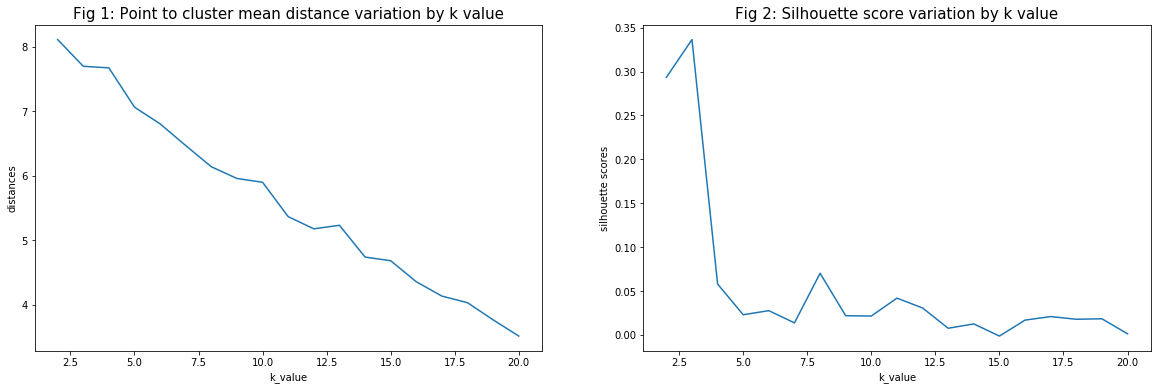

In [926]:
# Creates (fig_nb_col x fig_nb_row)  polar axes, and accesses them through the returned array
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 6) # set fihure size

# plot mean distances against k values
axes[0].plot(MTn_df_k['k_values'],MTn_df_k['distances'])
axes[0].set_xlabel('k_value')  
axes[0].set_ylabel('distances')  
# displaying the title 
axes[0].set_title(label='Fig 1: Point to cluster mean distance variation by k value', fontsize=15) 

# plot silhouette score against k values
axes[1].plot(MTn_df_k['k_values'],MTn_df_k['silhouette_scores'])
axes[1].set_xlabel('k_value')  
axes[1].set_ylabel('silhouette scores')  
# displaying the title 
axes[1].set_title(label='Fig 2: Silhouette score variation by k value', fontsize=15) 

In Figure 1 the elbow shape is not clear enough to make a decision, but in Figure 2, with silhouette scores, the global maximum clearly visible at k = 3. Therefore, the number of clusters of Manhattan neighborhoods will be 3.

In [927]:
# add clustering labels
MTn_neigh_grouped_venues_sorted.insert(0, 'Cluster Labels', Manhattan_km['kmean'].labels_)
MTn_neigh_grouped_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Battery Park City,Park,Coffee Shop,Gym,Sandwich Place,Food Court,Playground,Bar,Smoke Shop,Plaza,Burrito Place
1,0,Carnegie Hill,Italian Restaurant,Café,Gym / Fitness Center,Coffee Shop,Sushi Restaurant,Gym,Dance Studio,Deli / Bodega,Grocery Store,Gourmet Shop
2,0,Central Harlem,African Restaurant,Cosmetics Shop,Library,Flower Shop,Breakfast Spot,Cocktail Bar,Lounge,Southern / Soul Food Restaurant,Beer Bar,Ethiopian Restaurant
3,0,Chelsea,Theater,Cupcake Shop,Bar,Hotel,Italian Restaurant,Japanese Restaurant,French Restaurant,New American Restaurant,Chinese Restaurant,Café
4,0,Chinatown,Chinese Restaurant,Hotpot Restaurant,Bubble Tea Shop,Shanghai Restaurant,Cocktail Bar,Greek Restaurant,Boutique,Bakery,Spa,Dim Sum Restaurant


Now, let's add neighborhoods latitude and longitude to the data frame **MTn_neigh_grouped_venues_sorted**

In [928]:
Manhattan_neighs_merged = Manhattan_neighs

Manhattan_neighs_merged = Manhattan_neighs_merged.join(MTn_neigh_grouped_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Manhattan_neighs_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,40.876551,-73.910660,0,Deli / Bodega,Storage Facility,Asian Restaurant,Bank,Sandwich Place,Mexican Restaurant,Grocery Store,Train Station,Pharmacy,Pizza Place
1,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Hotpot Restaurant,Bubble Tea Shop,Shanghai Restaurant,Cocktail Bar,Greek Restaurant,Boutique,Bakery,Spa,Dim Sum Restaurant
2,Washington Heights,40.851903,-73.936900,0,Café,Chinese Restaurant,Park,Grocery Store,Pizza Place,Deli / Bodega,Mobile Phone Shop,Bakery,Coffee Shop,Accessories Store
3,Inwood,40.867684,-73.921210,0,Restaurant,Spanish Restaurant,American Restaurant,Bakery,Diner,Frozen Yogurt Shop,Bank,Pizza Place,Wine Bar,Café
4,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Yoga Studio,Pizza Place,Caribbean Restaurant,Cocktail Bar,Coffee Shop,Deli / Bodega,Pub,Donut Shop,Café


Let's check the number of neighborhoods per clusters

In [929]:
Manhattan_neighs_merged.groupby('Cluster Labels').count()

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,
0,37,37,37,37,37,37,37,37,37,37,37,37,37
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2


Almost all Manhattan neighborhoods fall into the same group in terms of venues.

### Let's visualize the resulting clusters

In [930]:
# create map
MTn_map_clusters = folium.Map(location=[location_MTn.latitude, location_MTn.longitude], zoom_start=11)

# set number of clusters
kclusters = Manhattan_km['kmean'].n_clusters

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Manhattan_neighs_merged['Latitude'], Manhattan_neighs_merged['Longitude'], Manhattan_neighs_merged['Neighborhood'], Manhattan_neighs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(MTn_map_clusters)
       
MTn_map_clusters

## Examine Clusters

Now, let's examine each cluster and determine the discriminating venue categories that distinguish each cluster.

### Cluster 1

In [931]:
MTn_cltr_1 = Manhattan_neighs_merged.loc[Manhattan_neighs_merged['Cluster Labels'] == 0, Manhattan_neighs_merged.columns[[0] + list(range(4, Manhattan_neighs_merged.shape[1]))]]
MTn_cltr_1.groupby(['1st Most Common Venue']).count().sort_values(by=["Neighborhood"], ascending=False).head()

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1st Most Common Venue,,,,,,,,,,
Theater,3,3,3,3,3,3,3,3,3,3
Italian Restaurant,3,3,3,3,3,3,3,3,3,3
Hotel,2,2,2,2,2,2,2,2,2,2
Park,2,2,2,2,2,2,2,2,2,2
Mexican Restaurant,2,2,2,2,2,2,2,2,2,2


This cluster represents **restaurants**, **spare times**

### Cluster 2

In [932]:
MTn_cltr_2 = Manhattan_neighs_merged.loc[Manhattan_neighs_merged['Cluster Labels'] == 1, Manhattan_neighs_merged.columns[[0] + list(range(4, Manhattan_neighs_merged.shape[1]))]]
MTn_cltr_2.groupby(['1st Most Common Venue']).count().sort_values(by=["Neighborhood"], ascending=False).head()

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1st Most Common Venue,,,,,,,,,,
Playground,1,1,1,1,1,1,1,1,1,1


This cluster represents **entertainment**

### Cluster 3

In [933]:
MTn_cltr_3 = Manhattan_neighs_merged.loc[Manhattan_neighs_merged['Cluster Labels'] == 2, Manhattan_neighs_merged.columns[[0] + list(range(4, Manhattan_neighs_merged.shape[1]))]]
MTn_cltr_3.groupby(['1st Most Common Venue']).count().sort_values(by=["Neighborhood"], ascending=False).head()

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1st Most Common Venue,,,,,,,,,,
Deli / Bodega,2,2,2,2,2,2,2,2,2,2


This cluster represents **shop**

### IV.3.2. Cluster Wan Chai Districts

In [971]:
# set number of clusters
max_k = 20
Wan_Chai_km = kmean_best_clusters(WCh_onehot_grouped.drop('Neighborhood',1),max_k,best_k_criterion='silhouette')

# check cluster labels generated for each row in the dataframe
Wan_Chai_km['kmean'].labels_[0:10]

working...................
 done


array([2, 0, 2, 4, 3, 4, 0, 0, 0, 0], dtype=int32)

In [972]:
Wan_Chai_km['kmean']

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

##### let's put model information with different k value into a data frame

In [973]:
WCh_k_value = Wan_Chai_km['k_values']
WCh_distances = Wan_Chai_km['distances']
WCh_silhouette_scores = Wan_Chai_km['silhouette_scores']
WCh_df_k = pd.DataFrame({'k_values':WCh_k_value, 'distances':WCh_distances, 'silhouette_scores':WCh_silhouette_scores})
WCh_df_k.head()

,k_values,distances,silhouette_scores
0,2,11.533802,0.240697
1,3,9.471619,0.349244
2,4,8.444814,0.363967
3,5,7.422483,0.377724
4,6,6.660136,0.354860


#### The choice of the number of clusters

Text(0.5, 1.0, 'Fig 2: Silhouette score variation by k value')

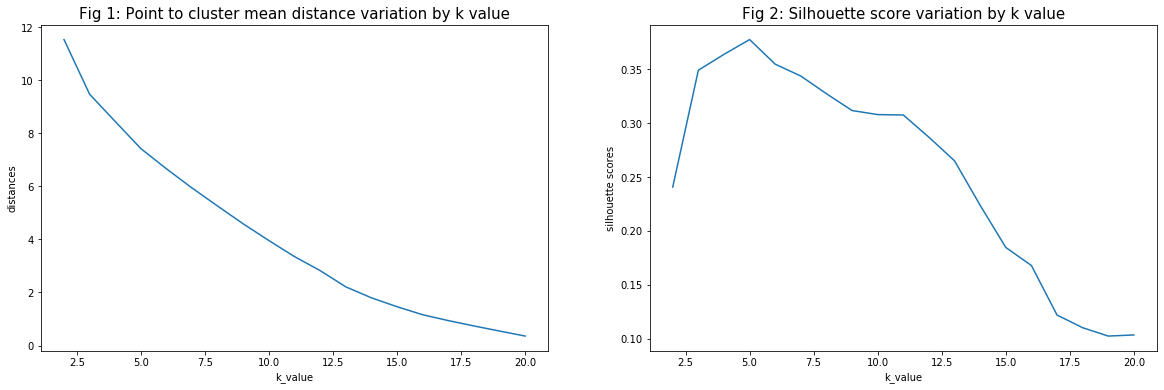

In [974]:
# Creates (fig_nb_col x fig_nb_row)  polar axes, and accesses them through the returned array
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 6) # set fihure size

# plot mean distances against k values
axes[0].plot(WCh_df_k['k_values'],WCh_df_k['distances'])
axes[0].set_xlabel('k_value')  
axes[0].set_ylabel('distances')  
# displaying the title 
axes[0].set_title(label='Fig 1: Point to cluster mean distance variation by k value', fontsize=15) 

# plot silhouette score against k values
axes[1].plot(WCh_df_k['k_values'],WCh_df_k['silhouette_scores'])
axes[1].set_xlabel('k_value')  
axes[1].set_ylabel('silhouette scores')  
# displaying the title 
axes[1].set_title(label='Fig 2: Silhouette score variation by k value', fontsize=15) 

In Figure 1 the elbow shape is not clear enough to make a decision, but in Figure 2, with silhouette scores, the global maximum clearly visible at k = 5. Therefore, the number of clusters of Wan Chai district neighborhoods will be 5.

In [975]:
# add clustering labels
WCh_neigh_grouped_venues_sorted.insert(0, 'Cluster Labels', Wan_Chai_km['kmean'].labels_)
WCh_neigh_grouped_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,1.0,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
1,0,2.0,Bus Stop,Cricket Ground,Coffee Shop,Chinese Restaurant,Tennis Court,Zhejiang Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant
2,2,4.0,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
3,4,5.0,Trail,Snack Place,Tunnel,Zhejiang Restaurant,Garden,Department Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store
4,3,6.0,Bus Stop,Zhejiang Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant


Now, let's add neighborhoods latitude and longitude to the data frame **WCh_neigh_grouped_venues_sorted**

In [976]:
Wan_Chai_neighs_merged = Wan_Chai_neighs

# merge neighborhoods_venues_sorted with toronto_postal_code to add latitude/longitude for each neighborhood
Wan_Chai_neighs_merged = Wan_Chai_neighs_merged.join(WCh_neigh_grouped_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Wan_Chai_neighs_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0.0,22.257687,114.172945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,22.257687,114.185287,2.0,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
2,2.0,22.257687,114.191459,0.0,Bus Stop,Cricket Ground,Coffee Shop,Chinese Restaurant,Tennis Court,Zhejiang Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant
3,3.0,22.262628,114.166774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,22.262628,114.172945,2.0,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant


NaN values are for neighborhoods where Fouresquare did return any venues.

Let's remove those NaN values

In [977]:
Wan_Chai_neighs_merged.dropna(axis=0,inplace=True)
Wan_Chai_neighs_merged.reset_index(drop=True,inplace=True)
Wan_Chai_neighs_merged['Neighborhood'] = Wan_Chai_neighs_merged['Neighborhood']
Wan_Chai_neighs_merged['Cluster Labels'] = np.int64(Wan_Chai_neighs_merged['Cluster Labels'])
#Wan_Chai_neighs_merged.drop(['Id'],axis=1,inplace=True)
Wan_Chai_neighs_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.0,22.257687,114.185287,2,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
1,2.0,22.257687,114.191459,0,Bus Stop,Cricket Ground,Coffee Shop,Chinese Restaurant,Tennis Court,Zhejiang Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant
2,4.0,22.262628,114.172945,2,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
3,5.0,22.262628,114.179116,4,Trail,Snack Place,Tunnel,Zhejiang Restaurant,Garden,Department Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store
4,6.0,22.262628,114.185287,3,Bus Stop,Zhejiang Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant


Let's give name to the neighborhoods

In [980]:
temp = Wan_Chai_neighs_merged[:]
for index, neigh in temp.iterrows():
    latlng = [neigh['Latitude'],neigh['Longitude']]
    Wan_Chai_neighs_merged['Neighborhood'][index] = neigh_name = get_neighborhood_name(latlng)

Wan_Chai_neighs_merged.head()

/home/amos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/amos/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Black Crag 布力徑 Black's Link,22.257687,114.185287,2,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
1,Pillbox PB3 布力徑 Black's Link,22.257687,114.191459,0,Bus Stop,Cricket Ground,Coffee Shop,Chinese Restaurant,Tennis Court,Zhejiang Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant
2,中峽道 Middle Gap Road 灣仔 Wan Chai,22.262628,114.172945,2,Mountain,Zhejiang Restaurant,Grocery Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant
3,布力徑 Black's Link 跑馬地 Happy Valley,22.262628,114.179116,4,Trail,Snack Place,Tunnel,Zhejiang Restaurant,Garden,Department Store,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store
4,黃泥涌峽道 Wong Nai Chung Gap Road 跑馬地 Happy Valley,22.262628,114.185287,3,Bus Stop,Zhejiang Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Dumpling Restaurant,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant


Let's check the number of neighborhoods per clusters

In [981]:
Wan_Chai_neighs_merged.groupby('Cluster Labels').count()

,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,
0,17,17,17,17,17,17,17,17,17,17,17,17,17
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2,2,2,2


### Let's visualize the resulting clusters

In [982]:
# create map
WCh_map_clusters = folium.Map(location=[location_HK.latitude, location_HK.longitude], zoom_start=13)

# set number of clusters
kclusters = Wan_Chai_km['kmean'].n_clusters

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Wan_Chai_neighs_merged['Latitude'], Wan_Chai_neighs_merged['Longitude'], Wan_Chai_neighs_merged['Neighborhood'], Wan_Chai_neighs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(WCh_map_clusters)
       
WCh_map_clusters

## Examine Clusters

Now, let's examine each cluster and determine the discriminating venue categories that distinguish each cluster.

### Cluster 1

In [983]:
WCh_cltr_1 = Wan_Chai_neighs_merged.loc[Wan_Chai_neighs_merged['Cluster Labels'] == 0, Wan_Chai_neighs_merged.columns[[0] + list(range(4, Wan_Chai_neighs_merged.shape[1]))]]
WCh_cltr_1.groupby(['1st Most Common Venue']).count().sort_values(by=["Neighborhood"], ascending=False).head()

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1st Most Common Venue,,,,,,,,,,
Japanese Restaurant,3,3,3,3,3,3,3,3,3,3
Cantonese Restaurant,2,2,2,2,2,2,2,2,2,2
Chinese Restaurant,2,2,2,2,2,2,2,2,2,2
Arts & Crafts Store,1,1,1,1,1,1,1,1,1,1
Bus Stop,1,1,1,1,1,1,1,1,1,1


This cluster of **asian restaurants**, a bit **transport** and **manual work**

### Cluster 2

In [984]:
WCh_cltr_2 = Wan_Chai_neighs_merged.loc[Wan_Chai_neighs_merged['Cluster Labels'] == 1, Wan_Chai_neighs_merged.columns[[0] + list(range(4, Wan_Chai_neighs_merged.shape[1]))]]
WCh_cltr_2.groupby(['1st Most Common Venue']).count().sort_values(by=["Neighborhood"], ascending=False).head()

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1st Most Common Venue,,,,,,,,,,
Scenic Lookout,1,1,1,1,1,1,1,1,1,1


Cluster of **observatory**

### Cluster 3

In [985]:
WCh_cltr_3 = Wan_Chai_neighs_merged.loc[Wan_Chai_neighs_merged['Cluster Labels'] == 2, Wan_Chai_neighs_merged.columns[[0] + list(range(4, Wan_Chai_neighs_merged.shape[1]))]]
WCh_cltr_3.groupby(['1st Most Common Venue']).count().sort_values(by=["Neighborhood"], ascending=False).head()

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1st Most Common Venue,,,,,,,,,,
Mountain,2,2,2,2,2,2,2,2,2,2


Cluster of **trip**

### Cluster 4

In [986]:
WCh_cltr_4 = Wan_Chai_neighs_merged.loc[Wan_Chai_neighs_merged['Cluster Labels'] == 3, Wan_Chai_neighs_merged.columns[[0] + list(range(4, Wan_Chai_neighs_merged.shape[1]))]]
WCh_cltr_4.groupby(['1st Most Common Venue']).count().sort_values(by=["Neighborhood"], ascending=False).head()

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1st Most Common Venue,,,,,,,,,,
Bus Stop,1,1,1,1,1,1,1,1,1,1


Cluster of **transport**

### Cluster 5

In [987]:
WCh_cltr_5 = Wan_Chai_neighs_merged.loc[Wan_Chai_neighs_merged['Cluster Labels'] == 4, Wan_Chai_neighs_merged.columns[[0] + list(range(4, Wan_Chai_neighs_merged.shape[1]))]]
WCh_cltr_5.groupby(['1st Most Common Venue']).count().sort_values(by=["Neighborhood"], ascending=False).head()

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1st Most Common Venue,,,,,,,,,,
Trail,2,2,2,2,2,2,2,2,2,2


Cluster of **Trails**

## V. Results and Discussion <a name="results"></a>

From this analysis, it has been shown that Manathan has more venues (registred in Foursquare database) than Wan Chai. If in fact, Fourquare's users in Manhattan are more active than those in Wan Chai, this can explain the low number of venues in that Hong Kong district. But, others things may explain this high difference in venues number. For example Wan Chai is known to have a significant part of its area covered by vegetation reducing the space for building substructres creating more type of venues. The size of Wan Chai may also be the cause.

We can also notice that, despite the high number of neighborhoods in Manhatan (40) the best number of clusters found using silhouette scores was 3 while the on for Wan Chai was 5 although its had less than 30 neighborhoods while clustering. Meanning that the neighborhoods that we have created are more heterogenous than those of Manhattan in terms of venues.

Looking at most common clusters of Wan Chai and Manhattan, it comes that restoration is the most common type of venues in these two city (all specification combined). But, a deeper look shows that in **asian restaurants** are de most common type of venue (probaly due to their culture), while in Manhattan **theaters** and **italian restaurant** are the leading venues. 

One more interesting fact about the most common clusters of these two cities is in structure of clusters. Indeed, in Manhattan, the most common cluster of neighborhood has as type of venues **theater**, **italian restaurant**, **hotel**, **park** and **mexican restaurant** which we have summarised to **restaurants** and **spare times**. Now, considering the most common cluster of neighborhood in Wan Chai, its is made of **japanese jestaurant**, **cantonese restaurant**, **chinese restaurant**, **arts and craft store** and **bus stop** which we have labeled as **asian restaurants**, a bit **transport** and **manual work**. This choice of labeling may go along with thought that asian spend more time in working compare to others people in the world.

## VI. Conclusion <a name="conclusion"></a>

Purpose of this project was, to identify, beyond their cultures, a potential similarty of dissimilarity between the neighborhoods of Manhattan and Whan Chai. Except the fact these two places are the wealthiest of their respective cities (Manhattan in New York and Whan Chai in Hong Kong) and that those two cities count the highest number of billionnaires in the world, the culture may generate a difference even in their neighborhoods.

It has been shown that despite a relative slighly difference in their respective most common cluster, on thing common to them is restoration. Providing and getting food remains the most common activities for people living in this two parts of the world.

Now, for a investor looking for what to do (create a venue as a business) the following two recommendations may useful. First if that person chooses to Manhattan for its business, an asian restaurant could be a great choice since one, restoration is already doing well, and two, there are few meaning less competion. If that person chooses Wan Chai, italian or american restaurants will be a good choice for the same reasons as for the choice of Manhattan. 
Finally, for people who are switching from one of these two places to the other, they will be able to find a neighborhood which will have some similarities with where tey came from so that the adaptation process will go smoothly.

Also, since there was no entertainment venues in the most common cluster of Wan Chai, it may be intersting to do another research to check weither the type venues around in a particular place may affect people working rythm. If yes, how?